# Neuron circuits for Dorsophila
Tielin Zhang, 2019-6-13

Contains three groups of neurons:

(1) Pn group;

(2) Kc group;

(3) APL group;

In [1]:
from brian2 import *
import random
%matplotlib inline
apl_enable = True
start_scope()

### Test the single small loop

In [2]:
tau = 5*ms
V0_1 = 0*mV
Vth = -45*mV
Vres = -80*mV
I = 0*mV/ms
eqs1 = '''
dv/dt = (V0_1-v)/tau + I: volt
'''
G1 = NeuronGroup(1, eqs1, threshold='v>Vth', reset='v=Vres', refractory=1*ms, method='linear') #method='Euler' linear
G1.v = -60*mV # initial value

V0_2 = -60*mV
eqs2 = '''
dv/dt = (V0_2-v)/tau + I: volt
'''

G2 = NeuronGroup(1, eqs2, threshold='v>Vth', reset='v=Vres', refractory=1*ms, method='linear') #method='Euler' linear
G2.v = -60*mV # initial value

S = Synapses(G1, G2, 'w : volt', on_pre='v_post += w')
S.connect() # connect all-to-all
S.w = '0*mV'

debug = False
if debug:
    M1 = StateMonitor(G1, 'v', record=0)
    M2 = StateMonitor(G2, 'v', record=0)

    run(50*ms)

    figure()
    subplot(211)
    plot(M1.t/ms, M1.v[0])
    xlabel('Time (ms)')
    ylabel('v');
    subplot(212)
    plot(M2.t/ms, M2.v[0])
    xlabel('Time (ms)')
    ylabel('v');

WARNING    C:\ProgramData\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Zhang\.cython\brian_extensions\_cython_magic_36ef093112cd1b088f6c8d6bb9179d1a.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


### The possion input generator

In [3]:
inputnum = 10
Poisson = PoissonGroup(inputnum, 100*Hz)

## PN Group (100-200 neurons)

A PN is modeled as the standard leaky integrate and fire (LIF) neuron. The membrane potential of a PN at time t is determined by the following differential equation, $\frac{dV}{dt} = \frac{(V0−V)}{\tau}+ I$, where $\tau$ is the membrane time constant and V0 is the resting potential. When the membrane potential of a PN exceeds the threshold value Vth, the PN emits a spike and the value of the membrane potential is reset to Vreset. After the spike emission, the PN enters an absolute refractory period that lasts for Vres. The membrane potential of a PN stays at Vres during the refractory period. The parameters in the leaky integrate-and-fire neuron model are set as follows: tau=5 ms,V0=−60mV,Vth=−45mV, Vreset=−60mV,and Vres =10ms.

In [4]:
tau_pn = 5*ms
V0_pn = -60*mV
Vth_pn = -45*mV
Vres_pn = -60*mV
I_pn = 0*mV/ms
eqs_pn = '''
dv/dt = (V0_pn-v)/tau_pn + I_pn: volt
'''
G_pn = NeuronGroup(144, eqs_pn, threshold='v>Vth_pn', reset='v=Vres_pn', refractory=4*ms, method='linear') #method='Euler' linear
G_pn.v = -60*mV # initial value

## KC Group (around 2500 neurons)

Here we use the similar LIF model for simplification.


In [5]:
tau_kc = 5*ms
V0_kc = -60*mV
Vth_kc = -36*mV
Vres_kc = -60*mV
eqs_kc = '''
dv/dt = (V0_kc-v)/tau_kc : volt
'''
G_kc = NeuronGroup(250, eqs_kc, threshold='v>Vth_kc', reset='v=Vres_kc', refractory=1*ms, method='Euler') #method='Euler' linear
G_kc.v = -60*mV # initial value

### APL Group (one neuron)

In [6]:
C = 0.1*nF
g_leak = 0.2*uS
V_leak = -60*mV
g_aplkc = 50*nS
V_rev = -90*mV
V_mid = -40*mV
V_slope = 5*mV
tau_apl = 4*ms
V_pre = 2*mV
eqs_apl = '''
S_inf = 1/(1+exp((V_mid - V_pre)/V_slope)): 1
dS/dt = (S_inf - S)/tau_apl : 1
I_input = g_aplkc * S*(v-V_rev) : amp
dv/dt =(I_input - g_leak*(v - V_leak))/ C : volt
'''
G_apl = NeuronGroup(1, eqs_apl,threshold='v>V_mid', reset='v=V_rev', refractory=1*ms, method='Euler') #method='Euler' linear
G_apl.v = -60*mV # initial value
# Because the apl equations contains the description of APL to KC synapse, so I disabled the APL-KC synapse below.

old code
```
tau_apl = 5*ms
V0_apl = -60*mV  # attractors
Vth_apl = -45*mV
Vres_apl = -60*mV 
eqs_apl = '''
dv/dt = (V0_apl-v)/tau_apl : volt
'''
G_apl = NeuronGroup(1, eqs_apl, threshold='v>Vth_apl', reset='v=Vres_apl', refractory=1*ms, method='Euler') #method='Euler' linear
G_apl.v = -60*mV # initial value
```

### Connection between input Possion to PN

In [7]:
S_p_pn = Synapses(Poisson, G_pn, 'w : volt', on_pre='v_post += w')
S_p_pn.connect() # connect all-to-all
S_p_pn.w = '5*mV'

### Connection between PN to KC

(1) PN->KC, each KC neuron accept mean 6 PN Axonal Terminal, 

(2) Big PN Axonal terminal to 20 KC neuron, 

(3) Small PN Axonal terminal to 8 KC neuron,

You cannot fit both of these three conditions.!!

In [8]:
S_pn_kc = Synapses(G_pn, G_kc, 'w : volt', on_pre='v_post += w')

propertion = 0.6 # the big Pn proportion in source group
bigPn = np.arange( 0, int(propertion*G_pn.N), 1) 
smallPn = np.arange( int(propertion*G_pn.N), G_pn.N, 1) 

arrayi = []
arrayj = []

for i in range(G_pn.N):
    if i in bigPn:
        ifrom = [i]*15
        random.seed(1)
        ito = [random.randint(0,G_kc.N-1) for _ in range(15)]
    else:
        ifrom = [i]*12
        random.seed(1)
        ito = [random.randint(0,G_kc.N-1) for _ in range(12)]
    arrayi.extend(ifrom)
    arrayj.extend(ito)
# arrayi = [int(i) for i in arrayi]
# arrayj = [int(j) for j in arrayj]
S_pn_kc.connect(i=arrayi, j=arrayj)
S_pn_kc.w = '10*mV'

### Calculation: How many mean input numbers of the each KC gets.

In [9]:
print('The mean inputs of KC neuron is : '+ str(len(S_pn_kc.i)/G_kc.N))

The mean inputs of KC neuron is : 7.944


### Connection KC >> APL

In [10]:
S_kc_apl = Synapses(G_kc, G_apl, 'w : volt', on_pre='v_post += w')
S_kc_apl.connect() # connect all-to-all
if apl_enable:
    S_kc_apl.w = '5*mV'
else:
    S_kc_apl.w = '0*mV'

### Connection APL >> KC

old code
```python
S_apl_kc = Synapses(G_apl, G_kc, 'w : volt', on_pre='v_post += w')
S_apl_kc.connect() # connect all-to-all
if apl_enable:
    S_apl_kc.w = '-1*mV'
else:
    S_apl_kc.w = '0*mV'
``` 

### Connection APL >> PN

In [11]:
S_apl_pn = Synapses(G_apl, G_pn, 'w : volt', on_pre='v_post += w')
S_apl_pn.connect() # connect all-to-all
for j in range(G_pn.N):
    if apl_enable:
        if j in bigPn:
            S_apl_pn.w[0,j] = '-5*mV'
        else:
            S_apl_pn.w[0,j] = '-1*mV'
    else:
        S_apl_pn.w[0,j] = '0*mV'

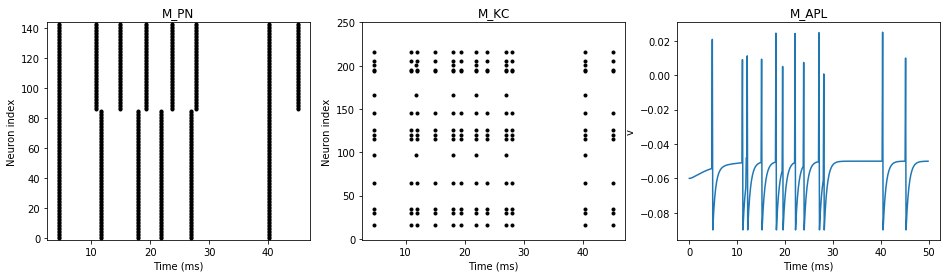

In [12]:
debug = True
if debug:
    M_pn = SpikeMonitor(G_pn)
    M_kc = SpikeMonitor(G_kc)
    M_apl = StateMonitor(G_apl, 'v', record=0)
    duration = 50*ms
    run(duration)

    figure(figsize=(16,4))
    subplot(131)
    plot(M_pn.t/ms, M_pn.i, '.k')
    xlabel('Time (ms)')
    ylabel('Neuron index');
    ylim(-1, G_pn.N)
    title('M_PN')
    subplot(132)
    plot(M_kc.t/ms, M_kc.i, '.k')
    xlabel('Time (ms)')
    ylabel('Neuron index');
    ylim(-1, G_kc.N)
    title('M_KC')
    subplot(133)
    plot(M_apl.t/ms, M_apl.v[0])
    xlabel('Time (ms)')
    ylabel('v');
    title('M_APL')

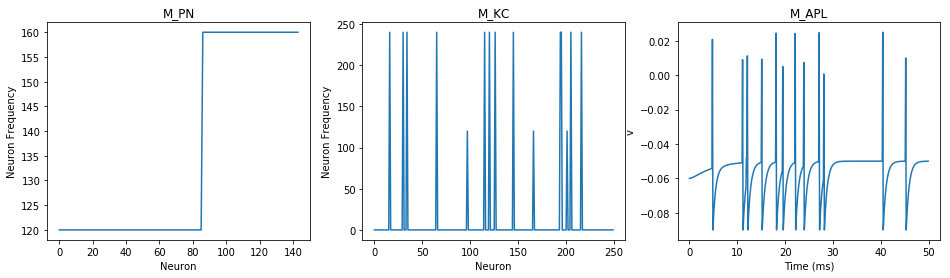

In [13]:
debug = True
if debug:
    figure(figsize=(16,4))
    subplot(131)
    plot(M_pn.count/duration)
    xlabel('Neuron')
    ylabel('Neuron Frequency');
    # ylim(-1, G_pn.N)
    title('M_PN')
    subplot(132)
    plot(M_kc.count/duration)
    xlabel('Neuron')
    ylabel('Neuron Frequency');
    # ylim(-1, G_kc.N)
    title('M_KC')
    subplot(133)
    plot(M_apl.t/ms, M_apl.v[0])
    xlabel('Time (ms)')
    ylabel('v');
    title('M_APL')